In [9]:
import sys
sys.path.append('/home/ngrav/project/wearables/')
import scripts.dtw
import torch
from sklearn.neighbors import KNeighborsRegressor
import time

def generate_data(N, L, D):
    '''
    Arguments:
      N (int): number of samples
      L (int): sequence length
      D (int): dimensionality

    '''
    return torch.rand(N, L, D)



In [ ]:
results = {'n': [], 't_fit': [], 't_pred': [], 'L': []}
for n in [32, 256, 512, 1024, 2048]:
    X = generate_data(n, 10080, 1).squeeze()
    tic = time.time()
    knndtw = KNeighborsRegressor(n_neighbors=5, 
                                 algorithm='ball_tree',
                                 metric=scripts.dtw.dtw, 
                                 weights='distance',
                                 n_jobs=32)
    knndtw.fit(X, torch.rand(X.shape[0],))
    results['t_fit'].append(time.time() - tic)
    tic = time.time()
    preds = knndtw.predict(X)
    results['t_pred'].append(time.time() - tic)
    results['n'].append(n)
    results['L'].append(X.shape[1])
    print(results)

{'n': [32], 't_fit': [0.24447035789489746], 't_pred': [9.169721841812134], 'L': [10080]}
{'n': [32, 256], 't_fit': [0.24447035789489746, 7.708814859390259], 't_pred': [9.169721841812134, 611.6846976280212], 'L': [10080, 10080]}
{'n': [32, 256, 512], 't_fit': [0.24447035789489746, 7.708814859390259, 18.988508701324463], 't_pred': [9.169721841812134, 611.6846976280212, 2466.167361497879], 'L': [10080, 10080, 10080]}


In [13]:
print(results)

{'n': [32, 256, 512, 1024, 2048], 't_fit': [0.24447035789489746, 7.708814859390259, 18.988508701324463, 45.51005983352661, 102.78354358673096], 't_pred': [9.169721841812134, 611.6846976280212, 2466.167361497879, 11342.965804338455, 34096.027482032776], 'L': [10080, 10080, 10080, 10080, 10080]}


In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle
import datetime
import re
import pyActigraphy

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import utils as wearutils
from wearables.scripts import data_v42 as weardata

import torch

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
# plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi'] = 600
sns.set_style("ticks")

In [3]:
results = {'n': [32, 256, 512], 't_fit': [0.23329877853393555, 7.069570064544678, 17.368834733963013], 't_pred': [10.28831934928894, 689.3890790939331, 2666.79279756546], 'L': [10080, 10080, 10080]}

In [6]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

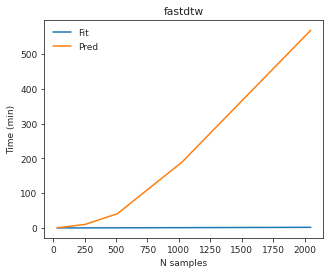

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(results['n'], np.array(results['t_fit'])/60, label='Fit', color=sns.color_palette()[0])
ax.plot(results['n'], np.array(results['t_pred'])/60, label='Pred', color=sns.color_palette()[1])
ax.legend()
ax.set_xlabel('N samples')
ax.set_ylabel('Time (min)')
ax.set_title('fastdtw')
fig.savefig('/home/ngrav/project/wearables/results/fastdtw_pred_time.png', bbox_inches='tight')